In [24]:
from grid2op.Agent import BaseAgent
from grid2op import make
from grid2op.PlotGrid import PlotMatplot
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
class MyAgent(BaseAgent):
    """
    The template to be used to create an agent: any controller of the power grid is expected to be a subclass of this
    grid2op.Agent.BaseAgent.
    """
    def __init__(self, action_space, curr_dir):
      """Initialize a new agent."""
      BaseAgent.__init__(self, action_space=action_space)
      self.all_actions = []
      actions = np.load(os.path.join(curr_dir, "track2_actions.npz"), allow_pickle=True)["all_actions"]
      for action in actions:
        self.all_actions.append(env.action_space.from_vect(action))
      self.all_actions = np.asarray(self.all_actions)



    def act(self, observation, reward, done):
      """The action that your agent will choose depending on the observation, the reward, and whether the state is terminal"""
      # do nothing for example (with the empty dictionary) :
      return np.random.choice(self.all_actions)
    
def make_agent(env, this_directory_path):
  my_agent = MyAgent(env.action_space, this_directory_path)
  return my_agent

In [42]:
env = make("rte_case5_example", test=True)
plot_helper = PlotMatplot(env.observation_space)

/home/gaetan/.local/lib/python3.8/site-packages/grid2op/MakeEnv/Make.py:323: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


In [5]:
agent = make_agent(env, ".")

IncorrectNumberOfElements: Grid2OpException EnvError IncorrectNumberOfElements "Incorrect number of elements found while load a GridObjects from a vector. Found 1500 elements instead of 58"

In [32]:
def print_info(env):
  # Load ids
  print("\nInjection information:")
  load_to_subid = env.action_space.load_to_subid
  print ('There are {} loads connected to substations with id: {}'.format(len(load_to_subid), load_to_subid))

  # Generators irds
  gen_to_subid = env.action_space.gen_to_subid
  print ('There are {} generators, connected to substations with id: {}'.format(len(gen_to_subid), gen_to_subid))

  # Line id sender
  print("\nPowerline information:")
  line_or_to_subid = env.action_space.line_or_to_subid
  line_ex_to_subid = env.action_space.line_ex_to_subid
  print ('There are {} transmissions lines on this grid. They connect:'.format(len(line_or_to_subid)))
  for line_id, (ori, ext) in enumerate(zip(line_or_to_subid, line_ex_to_subid)):
      print("Line with id {} coonects: substation origin id {} to substation extremity id {}".format(line_id, ori, ext))

  # Num of elements per SE
  print("\nSubstations information:")
  for i, nb_el in enumerate(env.action_space.sub_info):
      print("On susbtation {} there are {} elements.".format(i, nb_el))

7.1960154


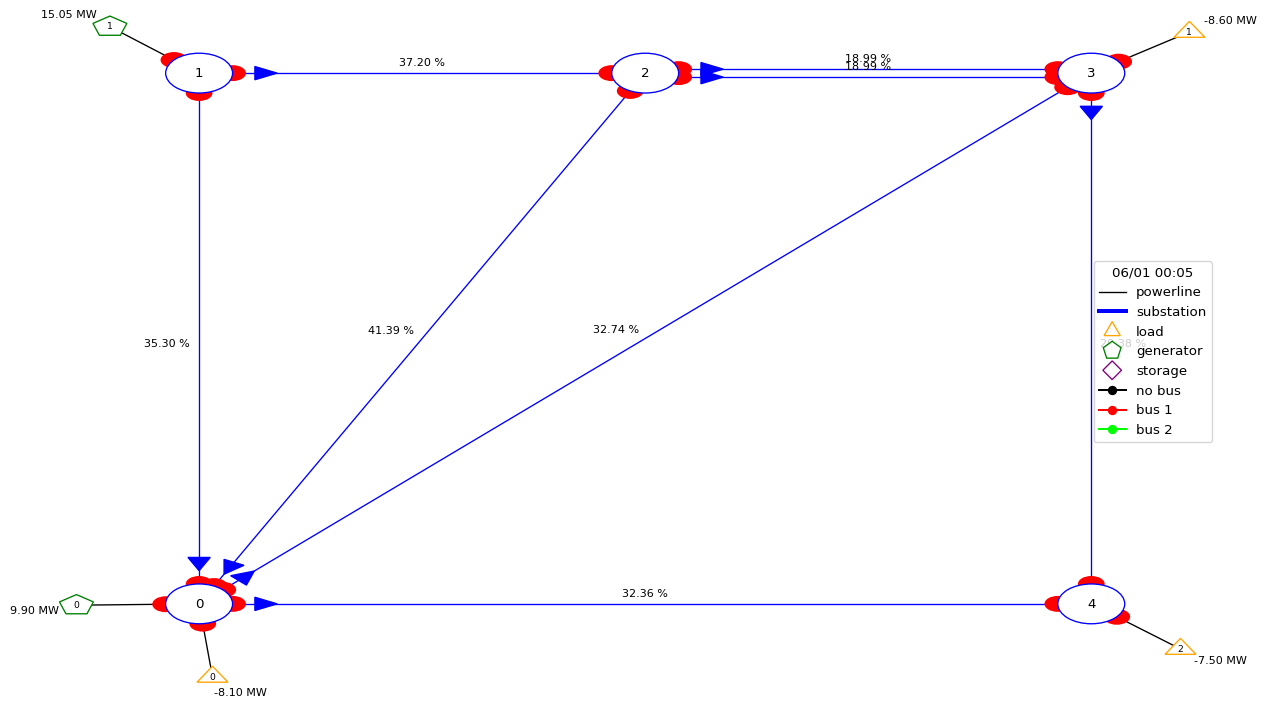

False
7.233032


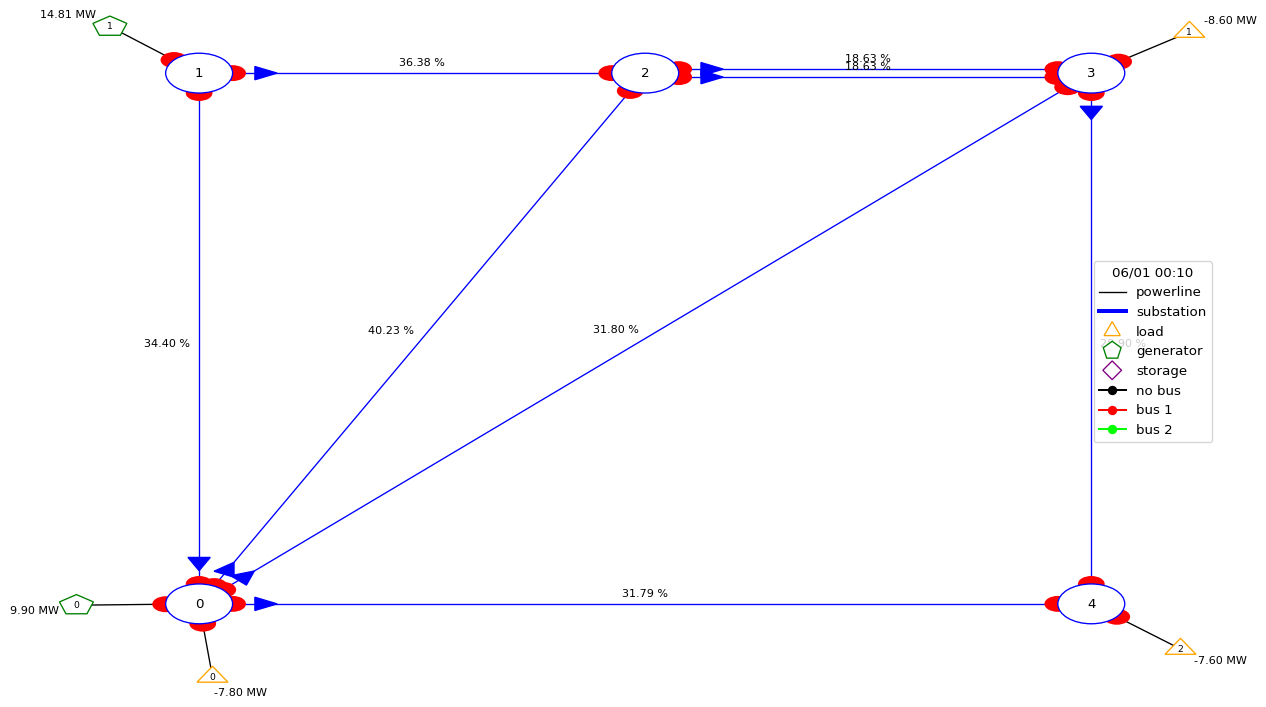

False
7.255049


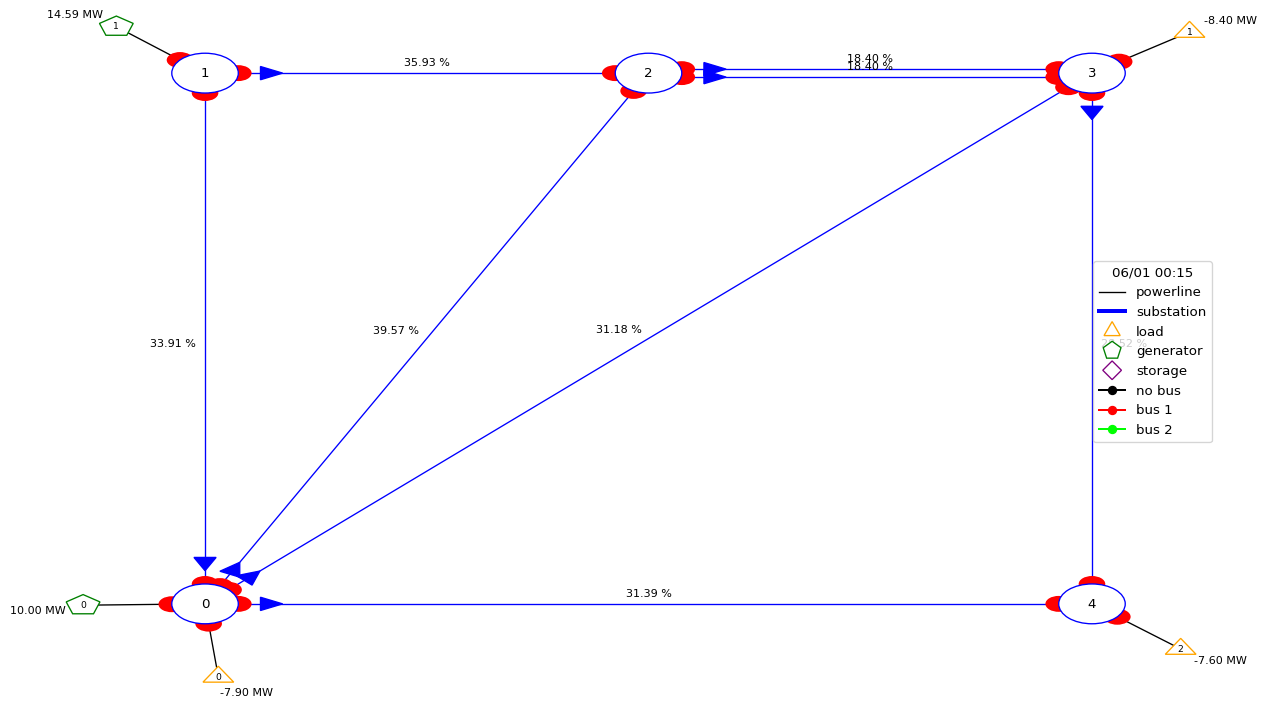

False
7.321911


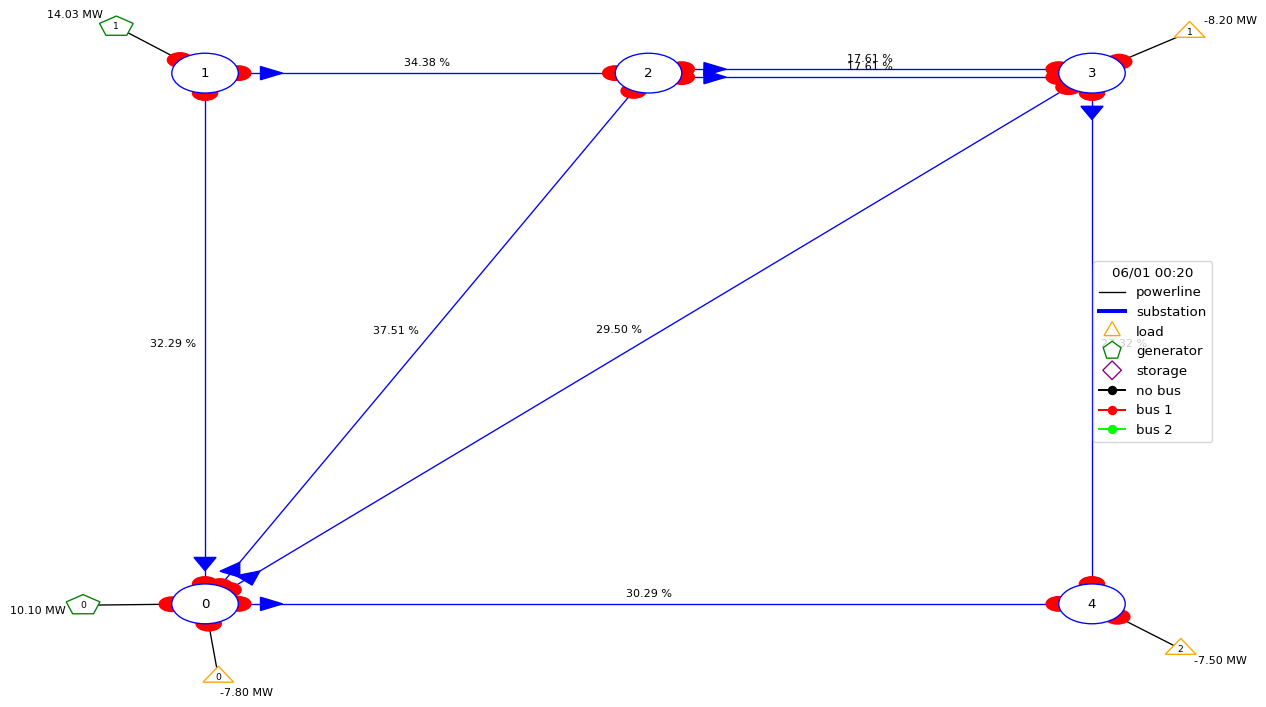

False
7.2959795


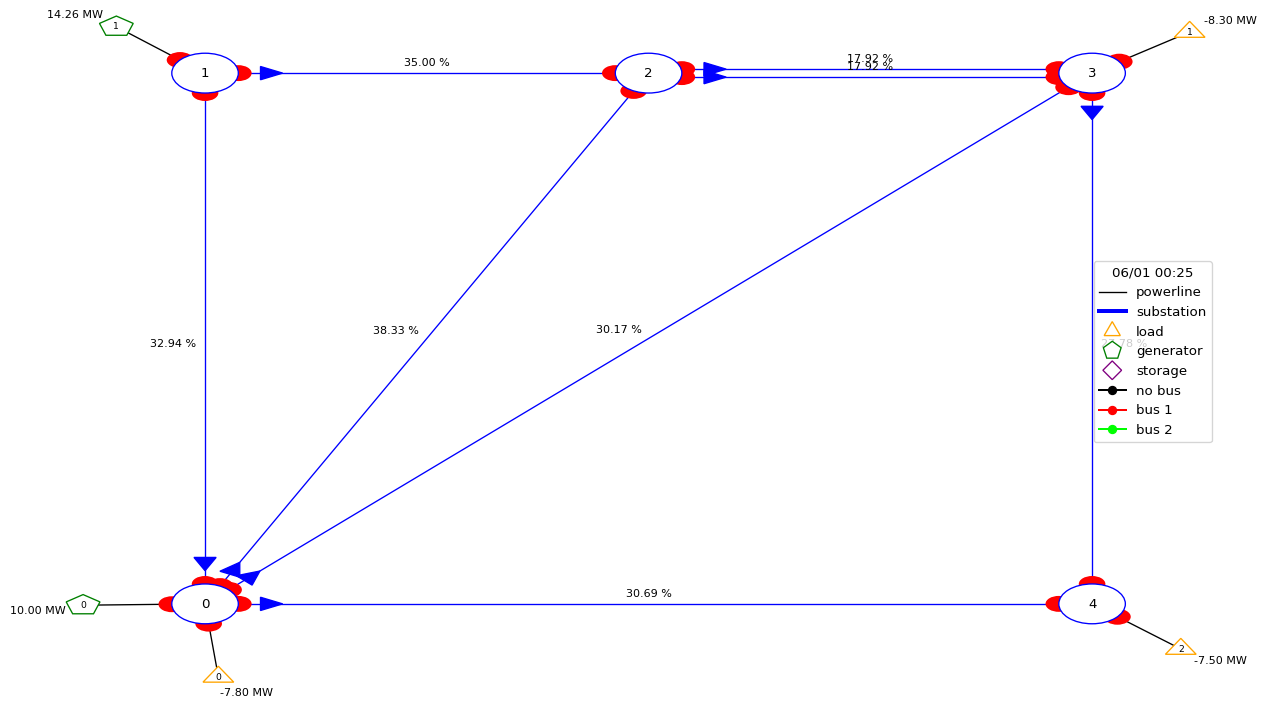

False


In [54]:
env.reset()
obs = env.current_obs
reward = env.current_reward
done = False
actions = [env.action_space({}), env.action_space({})]
for i in range(5):
  action = actions[0 if i == 0 else 1]
  obs, reward, done, info = env.step(action)
  print(reward)
  fig = plot_helper.plot_obs(obs)
  plt.show()
  print(done)
  if done: break

In [7]:
env.reset()
action = env.action_space({"set_line_status": [(0, -1)]})
obs, reward, done, info = env.step(action)

In [11]:
from grid2op.PlotGrid import PlotMatplot